<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a><center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

# Decision Trees und Random Forests mit Python

Dieses Notebook zeigt den Code zur Video-Lektion über Entscheidugnsbäume mit Python. Für die ausführlichen Erklärungen zum Code schaut bitte ins Video. 

## Libraries importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Die Daten laden

In [2]:
df = pd.read_csv('Kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Explorative Daten Analyse

Wir schauen uns ein einfaches Pairplot für diesen kleinen Datensatz an.

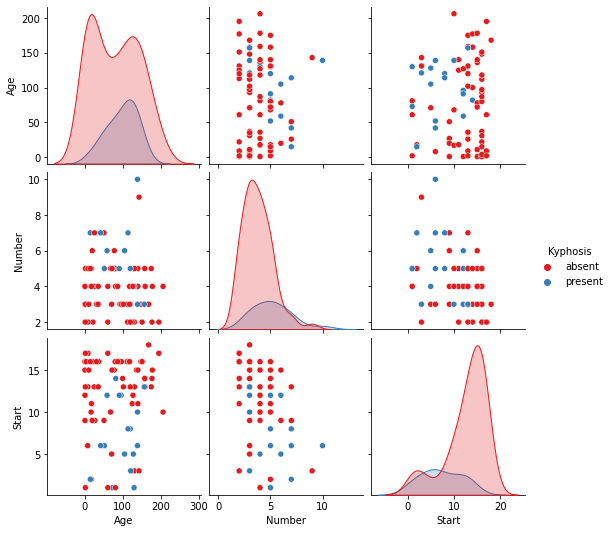

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

# Train Test Split

Fahren wir damit fort unsere Daten in Trainings- und Testset aufzuteilen:

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees (Entscheidungsbäume)

Wir beginnen damit einen einzelnen Entscheidungsbaum zu trainieren:

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier(random_state=0)

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

## Vorhersage und Auswertung

Lasst uns den Entscheidungsbaum auswerten.

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.73      0.89      0.80        18
     present       0.33      0.14      0.20         7

    accuracy                           0.68        25
   macro avg       0.53      0.52      0.50        25
weighted avg       0.62      0.68      0.63        25



In [22]:
print(confusion_matrix(y_test,predictions))

[[16  2]
 [ 6  1]]


## Entscheidungsbaum Visualisierung

SciKit Learn verfügt über die eingebaute Fähigkeit Entscheidungsbäume zu visualisieren. 

Dies wirst du vermutlich nicht oft benötigen und es erfordert die Installation von `pydot` und `graphviz`:

    conda install graphviz
    
    pip install pydot
    
    pip install six
    
*Hinweis 1: Beachtet bitte die Reihenfolge. Je nach eueren Python- und Library-Versionen benötigt graphviz die Anpassung einiger Versionen. Diese müssen wir zur Nutzung von Decision Tree Visualisierungen zustimmen.*

*Hinweis 2: Unter Ubuntu Linux ist die Installation von graphviz mit sudo apt install graphviz -y erforderlich.*

Nichtsdestotrotz schauen wir uns der Vollständigkeit halber ein Beispiel davon an!

In [ ]:
%conda install graphviz
    
%pip install pydot

%pip install six

In [24]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

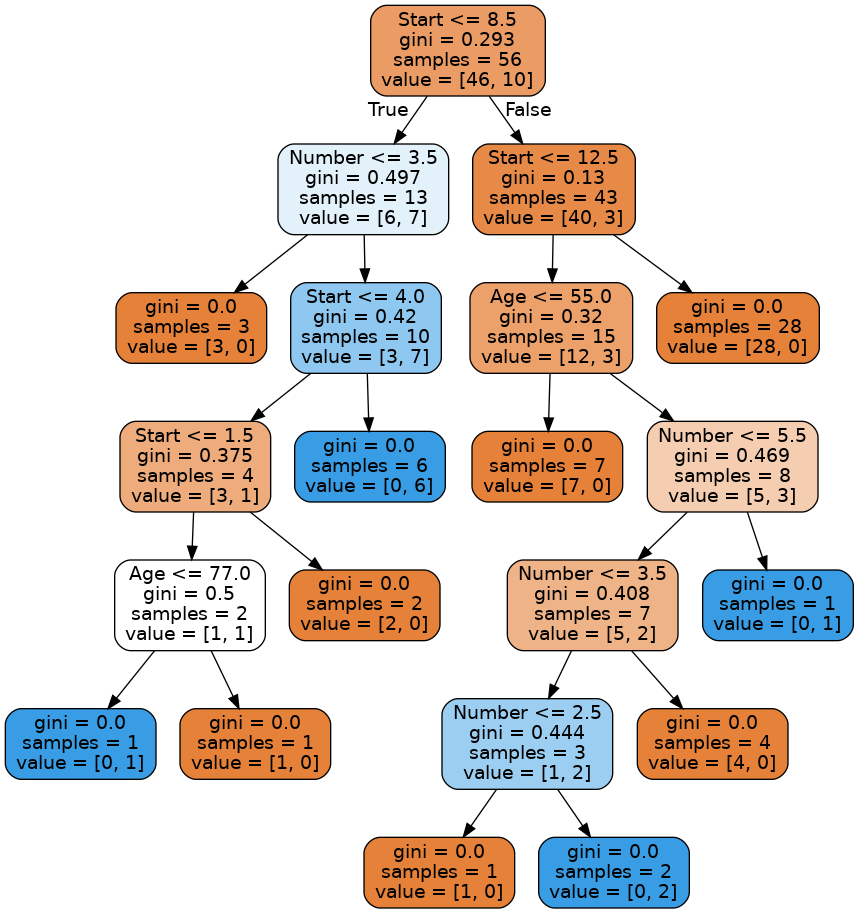

In [25]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Jetzt können wir unseren Entscheidungsbaum mit einen Random Forest vergleichen:

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
rfc_pred = rfc.predict(X_test)

In [39]:
print(confusion_matrix(y_test,rfc_pred))

[[18  0]
 [ 4  3]]


In [40]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      1.00      0.90        18
     present       1.00      0.43      0.60         7

    accuracy                           0.84        25
   macro avg       0.91      0.71      0.75        25
weighted avg       0.87      0.84      0.82        25



# Gut gemacht!